<div style="text-align: right">INFO 6106 Machine Learning Final Project Help</div>
<div style="text-align: right">Dino Konstantopoulos 25 March 2024</div>

# Traverse City

We attempt to verify that cloud sequences are contiguous

In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import ast
from tqdm import tqdm
# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import cv2
%matplotlib inline

I think this is just winter months:

In [2]:
les = pd.read_csv(r'./Data/2006Fall_2017Spring_GOES_meteo_combined.csv')
les.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp (F),RH (%),...,Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F)
0,2006-10-01,00:00,2006-09-30,00:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",48,86,...,4100,4800,7000,10,984.0,1007.00,1006.80,0.00,45,NC
1,2006-10-01,01:00,2006-09-30,01:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,983.7,1006.50,1006.40,0.00,44,NC
2,2006-10-01,02:00,2006-09-30,02:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,5500,11000,m,10,982.7,1005.70,1005.40,0.00,45,NC
3,2006-10-01,03:00,2006-09-30,03:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,982.0,1005.10,1004.70,0.00,44,NC
4,2006-10-01,04:00,2006-09-30,04:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",48,89,...,2200,3500,m,8,982.0,1004.90,1004.70,0.02,46,NC


# EDA

In [3]:
column_names = les.columns.tolist()
print(column_names)

['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'File_name_for_1D_lake', 'File_name_for_2D_lake', 'Lake_data_1D', 'Lake_data_2D', 'Temp (F)', 'RH (%)', 'Dewpt (F)', 'Wind Spd (mph)', 'Wind Direction (deg)', 'Peak Wind Gust(mph)', 'Low Cloud Ht (ft)', 'Med Cloud Ht (ft)', 'High Cloud Ht (ft)', 'Visibility (mi)', 'Atm Press (hPa)', 'Sea Lev Press (hPa)', 'Altimeter (hPa)', 'Precip (in)', 'Wind Chill (F)', 'Heat Index (F)']


In [4]:
# Renaming
les.rename(columns={ "Temp (F)": "Temp_F", "RH (%)": "RH_pct",
                   "Dewpt (F)" : "Dewpt_F", "Wind Spd (mph)" : "Wind_Spd_mph",
                   "Wind Direction (deg)" : "Wind_Direction_deg", "Peak Wind Gust(mph)" : "Peak_Wind_Gust_mph",
                   "Low Cloud Ht (ft)" : "Low_Cloud_Ht_ft", "Med Cloud Ht (ft)" : "Med_Cloud_Ht_ft",
                   "High Cloud Ht (ft)" : "High_Cloud_Ht_ft", "Visibility (mi)" : "Visibility_mi",
                   "Atm Press (hPa)" : "Atm_Press_hPa", "Sea Lev Press (hPa)" : "Sea_Lev_Press_hPa",
                   "Altimeter (hPa)" : "Altimeter_hPa", "Precip (in)" : "Precip_in",
                   "Wind Chill (F)" : "Wind_Chill_F", "Heat Index (F)" : "Heat_Index_F",
                   } , inplace = True)

les.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,Wind_Chill_F,Heat_Index_F
0,2006-10-01,00:00,2006-09-30,00:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",48,86,...,4100,4800,7000,10,984.0,1007.00,1006.80,0.00,45,NC
1,2006-10-01,01:00,2006-09-30,01:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,983.7,1006.50,1006.40,0.00,44,NC
2,2006-10-01,02:00,2006-09-30,02:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,5500,11000,m,10,982.7,1005.70,1005.40,0.00,45,NC
3,2006-10-01,03:00,2006-09-30,03:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,982.0,1005.10,1004.70,0.00,44,NC
4,2006-10-01,04:00,2006-09-30,04:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",48,89,...,2200,3500,m,8,982.0,1004.90,1004.70,0.02,46,NC


#### Missing value handling in dataframe
- As per the abbr in the table:
    - `m` or `M`: Data is missing
    - `NC`: Wind Chill/Heat Index do not meet the required thresholds to be calculated

Replace the missing values with 0.

In [5]:
# Replace with 0
les = les.replace(['m', 'M'], '0')

#### Drop **Wind_Chill_F** and **Heat_Index_F** due to a large number of NC values

In [6]:
les = les.drop(['Wind_Chill_F', 'Heat_Index_F'], axis=1)
les = les.reset_index(drop=True)

In [7]:
def missing_values(df):
    total_null = df.isna().sum()
    percent_null = total_null / df.count() # Total count of null values / Total count of values
    missing_data = pd.concat([total_null, percent_null], axis = 1, keys = ['Total Null', 'Percentage Null'])
    return missing_data

missing_values(les)

,Total Null,Percentage Null
Date_UTC,0,0.000000
Time_UTC,0,0.000000
Date_CST,0,0.000000
Time_CST,0,0.000000
File_name_for_1D_lake,2941,0.065095
File_name_for_2D_lake,2941,0.065095
Lake_data_1D,0,0.000000
Lake_data_2D,0,0.000000
Temp_F,239,0.004991
RH_pct,239,0.004991


Dropping null values:

In [8]:
les = les.dropna()
print('Total observation count after missing value treatment: ', len(les))

Total observation count after missing value treatment:  44942


>**Note to self**: Next run, replace NA with 0 because we may actually have erased too many records by dropping NAs...

#### Changing Datatype

In [9]:
les.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44942 entries, 0 to 48120
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date_UTC               44942 non-null  object
 1   Time_UTC               44942 non-null  object
 2   Date_CST               44942 non-null  object
 3   Time_CST               44942 non-null  object
 4   File_name_for_1D_lake  44942 non-null  object
 5   File_name_for_2D_lake  44942 non-null  object
 6   Lake_data_1D           44942 non-null  object
 7   Lake_data_2D           44942 non-null  object
 8   Temp_F                 44942 non-null  object
 9   RH_pct                 44942 non-null  object
 10  Dewpt_F                44942 non-null  object
 11  Wind_Spd_mph           44942 non-null  object
 12  Wind_Direction_deg     44942 non-null  object
 13  Peak_Wind_Gust_mph     44942 non-null  object
 14  Low_Cloud_Ht_ft        44942 non-null  object
 15  Med_Cloud_Ht_ft        4

In [10]:
# Using apply method
columns = les.columns
les[columns[8:]] = les[columns[8:]].apply(pd.to_numeric, errors='coerce')

In [11]:
les.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44942 entries, 0 to 48120
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date_UTC               44942 non-null  object 
 1   Time_UTC               44942 non-null  object 
 2   Date_CST               44942 non-null  object 
 3   Time_CST               44942 non-null  object 
 4   File_name_for_1D_lake  44942 non-null  object 
 5   File_name_for_2D_lake  44942 non-null  object 
 6   Lake_data_1D           44942 non-null  object 
 7   Lake_data_2D           44942 non-null  object 
 8   Temp_F                 44942 non-null  float64
 9   RH_pct                 44942 non-null  float64
 10  Dewpt_F                44942 non-null  float64
 11  Wind_Spd_mph           44942 non-null  int64  
 12  Wind_Direction_deg     44942 non-null  int64  
 13  Peak_Wind_Gust_mph     44942 non-null  int64  
 14  Low_Cloud_Ht_ft        44942 non-null  int64  
 15  Med_Clo

#### Dropping data for the night-time
We focus on data from **14:00 UTC to 21:00 UTC**, when there is enough sunlight to generate reflections and capture useful information. This time window provides valid data for the experiment and can be used to extract important insights from Lake Michigan and its surrounding areas.

`14:00 UTC is 10:00am EST and 21:00 UTC is 5:00pm EST.`

In [12]:
filtered_les = les.loc[(les['Time_UTC'] >= '14:00')
                     & (les['Time_UTC'] <= '21:00')]
filtered_les

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
14,2006-10-01,14:00,2006-10-01,14:00,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,...,270,0,3600,0,0,10,994.7,1017.8,1017.6,0.0
15,2006-10-01,15:00,2006-10-01,15:00,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,...,0,0,0,0,0,10,994.7,1017.7,1017.6,0.0
16,2006-10-01,16:00,2006-10-01,16:00,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,...,40,0,0,0,0,10,994.7,1017.8,1017.6,0.0
17,2006-10-01,17:00,2006-10-01,17:00,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",55.0,71.0,...,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0
18,2006-10-01,18:00,2006-10-01,18:00,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",50.0,82.0,...,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48114,2015-03-31,17:00,2015-03-31,17:00,goes15.2015.03.31.1700.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1700.v01.nc-var1-t0.csv.csv,"[0.225, 0.22749999, 0.48, 0.3075, 0.1925, 0.24...","[array([ nan, nan, nan, nan, nan...",39.0,54.0,...,20,0,7000,10000,0,10,989.0,1012.6,1011.9,0.0
48115,2015-03-31,18:00,2015-03-31,18:00,goes15.2015.03.31.1800.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1800.v01.nc-var1-t0.csv.csv,"[0.2075, 0.1925, 0.18249999, 0.1625, 0.1725, 0...","[array([ nan, nan, nan, nan, nan...",37.0,61.0,...,330,0,5500,7000,0,10,989.3,1012.8,1012.2,0.0
48116,2015-03-31,19:00,2015-03-31,19:00,goes15.2015.03.31.1900.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv,"[0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...","[array([ nan, nan, nan, ...",37.0,66.0,...,310,18,3500,5500,0,10,990.7,1014.1,1013.5,0.0
48117,2015-03-31,20:00,2015-03-31,20:00,goes15.2015.03.31.2000.v01.nc-var1-t0.csv,T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv,"[0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...","[array([ nan, nan, nan, nan, nan...",36.0,85.0,...,0,0,2100,2900,5000,10,991.0,1014.6,1013.9,0.0


In [13]:
filtered_les = filtered_les.reset_index(drop=True)
filtered_les.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
0,2006-10-01,14:00,2006-10-01,14:00,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,...,270,0,3600,0,0,10,994.7,1017.8,1017.6,0.0
1,2006-10-01,15:00,2006-10-01,15:00,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,...,0,0,0,0,0,10,994.7,1017.7,1017.6,0.0
2,2006-10-01,16:00,2006-10-01,16:00,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,...,40,0,0,0,0,10,994.7,1017.8,1017.6,0.0
3,2006-10-01,17:00,2006-10-01,17:00,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",55.0,71.0,...,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0
4,2006-10-01,18:00,2006-10-01,18:00,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",50.0,82.0,...,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0


In [14]:
# Summary
filtered_les.describe()

,Temp_F,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
count,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000
mean,34.777540,68.733329,25.085078,7.167414,159.115778,4.482041,4563.364992,3438.374691,1019.519765,8.158518,990.881814,959.613658,1014.846064,0.002405
std,14.316023,14.901769,13.510689,5.083779,127.925488,9.498400,5745.372636,6299.684479,3960.147230,3.046510,42.279235,233.710831,27.735722,0.016895
min,-15.000000,0.000000,-20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,59.000000,16.000000,3.000000,0.000000,0.000000,1500.000000,0.000000,0.000000,7.000000,987.000000,1009.500000,1009.800000,0.000000
50%,34.000000,70.000000,25.000000,7.000000,190.000000,0.000000,2700.000000,0.000000,0.000000,10.000000,993.000000,1016.400000,1016.300000,0.000000
75%,44.000000,80.000000,34.000000,10.000000,270.000000,0.000000,4500.000000,3900.000000,0.000000,10.000000,999.000000,1022.500000,1022.000000,0.000000
max,88.000000,100.000000,66.000000,34.000000,360.000000,52.000000,28000.000000,25000.000000,26000.000000,10.000000,1018.900000,1043.600000,1042.300000,0.860000


In [15]:
print('Total observations: ', filtered_les.shape[0])
print('Total number of features: ', filtered_les.shape[1])

Total observations:  14951
Total number of features:  22


## Adding the rain column to classify the rain as none, moderate, medium, high

In [16]:
filtered_les['rain'] = 'NONE'

In [17]:
for i,row in filtered_les.iterrows():
    if row['Precip_in'] > 0.0 and row['Precip_in'] < 0.03:
        filtered_les.at[i, 'rain'] = 'moderate'
    elif row['Precip_in'] >= 0.03 and row['Precip_in'] < 0.3:
        filtered_les.at[i, 'rain'] = 'medium'
    elif row['Precip_in'] >= 0.3:
        filtered_les.at[i, 'rain'] = 'high'
    else:
        filtered_les.at[i, 'rain'] = 'none'

In [18]:
rows_with_moderate_rainfall = filtered_les[filtered_les['rain'] == 'moderate']
rows_with_medium_rainfall = filtered_les[filtered_les['rain'] == 'medium']
rows_with_high_rainfall = filtered_les[filtered_les['rain'] == 'high']
rows_with_none_rainfall = filtered_les[filtered_les['rain'] == 'none']


In [19]:
print(rows_with_moderate_rainfall.shape[0])
print(rows_with_medium_rainfall.shape[0])
print(rows_with_high_rainfall.shape[0])
print(rows_with_none_rainfall.shape[0])

658
397
6
13890


In [20]:
print(rows_with_moderate_rainfall.shape[0] + rows_with_medium_rainfall.shape[0] + rows_with_high_rainfall.shape[0] + rows_with_none_rainfall.shape[0])

14951


In [21]:
data_sample = les['Lake_data_1D'][16]
data_sample

'[0.0725, 0.067499995, 0.07, 0.07, 0.067499995, 0.067499995, 0.065, 0.067499995, 0.07, 0.0625, 0.0625, 0.06, 0.0625, 0.055, 0.067499995, 0.055, 0.065, 0.07, 0.065, 0.0725, 0.0775, 0.0625, 0.067499995, 0.0625, 0.065, 0.067499995, 0.0625, 0.0625, 0.06, 0.0625, 0.0625, 0.065, 0.06, 0.06, 0.0625, 0.0625, 0.067499995, 0.067499995, 0.067499995, 0.067499995, 0.0775, 0.074999996, 0.067499995, 0.065, 0.049999997, 0.049999997, 0.067499995, 0.067499995, 0.055, 0.055, 0.0725, 0.067499995, 0.065, 0.0625, 0.065, 0.0625, 0.065, 0.057499997, 0.065, 0.0725, 0.0625, 0.0625, 0.065, 0.07, 0.067499995, 0.0625, 0.057499997, 0.055, 0.0625, 0.074999996, 0.055, 0.06, 0.0625, 0.067499995, 0.057499997, 0.0625, 0.067499995, 0.065, 0.057499997, 0.065, 0.0625, 0.0625, 0.067499995, 0.06, 0.0625, 0.067499995, 0.065, 0.085, 0.067499995, 0.082499996, 0.057499997, 0.0625, 0.055, 0.06, 0.067499995, 0.057499997, 0.065, 0.0625, 0.0625, 0.06, 0.067499995, 0.055, 0.065, 0.0625, 0.0625, 0.06, 0.067499995, 0.057499997, 0.06749

## Training a random forest 

In [22]:
import cv2

# Load the image
image = cv2.imread('./Images/lake-michigan-images-64/high/13625.png')

# Calculate the sum of pixel values
sum_pixel_values = image.sum()

# Get the total number of pixels
total_pixels = image.size

# Calculate the intensity
intensity = sum_pixel_values / total_pixels

print(f"The intensity of the image is: {intensity}")


The intensity of the image is: 30.17919921875


In [23]:

# Create an empty DataFrame
img_intensity_rain = pd.DataFrame(columns=['img_intensity', 'rain'])




In [24]:
img_intensity_rain

,img_intensity,rain


In [25]:
import os
import cv2
import pandas as pd



# Specify the path to the folder
folder_path = './Images/lake-michigan-images-64/none/'

# List all files in the folder
files = os.listdir(folder_path)

# Iterate through each file
for file_name in files:
    # Check if the item is a file (not a directory)
    if os.path.isfile(os.path.join(folder_path, file_name)):
        # Load the image
        image = cv2.imread(os.path.join(folder_path, file_name))

        # Calculate the sum of pixel values
        sum_pixel_values = image.sum()
        
        # Get the total number of pixels
        total_pixels = image.size
        
        # Calculate the intensity
        intensity = sum_pixel_values / total_pixels
        
        # Create a new DataFrame with values to append
        new_data = pd.DataFrame({'img_intensity': [intensity], 'rain': ['none']})
        
        # Append the new data to the original DataFrame
        img_intensity_rain = pd.concat([img_intensity_rain, new_data], ignore_index=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_16188\3536443612.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  img_intensity_rain = pd.concat([img_intensity_rain, new_data], ignore_index=True)


In [26]:
import os
import cv2
import pandas as pd



# Specify the path to the folder
folder_path = './Images/lake-michigan-images-64/moderate/'

# List all files in the folder
files = os.listdir(folder_path)

# Iterate through each file
for file_name in files:
    # Check if the item is a file (not a directory)
    if os.path.isfile(os.path.join(folder_path, file_name)):
        # Load the image
        image = cv2.imread(os.path.join(folder_path, file_name))

        # Calculate the sum of pixel values
        sum_pixel_values = image.sum()
        
        # Get the total number of pixels
        total_pixels = image.size
        
        # Calculate the intensity
        intensity = sum_pixel_values / total_pixels
        
        # Create a new DataFrame with values to append
        new_data = pd.DataFrame({'img_intensity': [intensity], 'rain': ['moderate']})
        
        # Append the new data to the original DataFrame
        img_intensity_rain = pd.concat([img_intensity_rain, new_data], ignore_index=True)


In [27]:
import os
import cv2
import pandas as pd



# Specify the path to the folder
folder_path = './Images/lake-michigan-images-64/medium/'

# List all files in the folder
files = os.listdir(folder_path)

# Iterate through each file
for file_name in files:
    # Check if the item is a file (not a directory)
    if os.path.isfile(os.path.join(folder_path, file_name)):
        # Load the image
        image = cv2.imread(os.path.join(folder_path, file_name))

        # Calculate the sum of pixel values
        sum_pixel_values = image.sum()
        
        # Get the total number of pixels
        total_pixels = image.size
        
        # Calculate the intensity
        intensity = sum_pixel_values / total_pixels
        
        # Create a new DataFrame with values to append
        new_data = pd.DataFrame({'img_intensity': [intensity], 'rain': ['medium']})
        
        # Append the new data to the original DataFrame
        img_intensity_rain = pd.concat([img_intensity_rain, new_data], ignore_index=True)


In [28]:
import os
import cv2
import pandas as pd



# Specify the path to the folder
folder_path = './Images/lake-michigan-images-64/high/'

# List all files in the folder
files = os.listdir(folder_path)

# Iterate through each file
for file_name in files:
    # Check if the item is a file (not a directory)
    if os.path.isfile(os.path.join(folder_path, file_name)):
        # Load the image
        image = cv2.imread(os.path.join(folder_path, file_name))

        # Calculate the sum of pixel values
        sum_pixel_values = image.sum()
        
        # Get the total number of pixels
        total_pixels = image.size
        
        # Calculate the intensity
        intensity = sum_pixel_values / total_pixels
        
        # Create a new DataFrame with values to append
        new_data = pd.DataFrame({'img_intensity': [intensity], 'rain': ['high']})
        
        # Append the new data to the original DataFrame
        img_intensity_rain = pd.concat([img_intensity_rain, new_data], ignore_index=True)


In [29]:
img_intensity_rain.shape

(14952, 2)

In [30]:
# Create an empty DataFrame
img_intensity_min_max = pd.DataFrame(columns=['rain', 'min', 'max'])



In [31]:
# Filter the DataFrame where 'rain' is 'none'
filtered_df = img_intensity_rain[img_intensity_rain['rain'] == 'none']
# Find the minimum and maximum values of 'img_intensity' in the filtered DataFrame
min_intensity = filtered_df['img_intensity'].min()
max_intensity = filtered_df['img_intensity'].max()

# Create a new DataFrame with values to append
new_data = pd.DataFrame({'rain': ['none'], 'min': [min_intensity], 'max': [max_intensity]})
# Append the new data to the original DataFrame
img_intensity_min_max = pd.concat([img_intensity_min_max, new_data], ignore_index=True)
print('Minimum intensity with rain status "none":', min_intensity)
print('Maximum intensity with rain status "none":', max_intensity)
img_intensity_min_max.head()

Minimum intensity with rain status "none": 0.7578125
Maximum intensity with rain status "none": 55.90576171875


C:\Users\Asus\AppData\Local\Temp\ipykernel_16188\1126049744.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  img_intensity_min_max = pd.concat([img_intensity_min_max, new_data], ignore_index=True)


,rain,min,max
0,none,0.757812,55.905762


In [32]:
# Filter the DataFrame where 'rain' is 'none'
filtered_df = img_intensity_rain[img_intensity_rain['rain'] == 'moderate']
# Find the minimum and maximum values of 'img_intensity' in the filtered DataFrame
min_intensity = filtered_df['img_intensity'].min()
max_intensity = filtered_df['img_intensity'].max()

# Create a new DataFrame with values to append
new_data = pd.DataFrame({'rain': ['moderate'], 'min': [min_intensity], 'max': [max_intensity]})
# Append the new data to the original DataFrame
img_intensity_min_max = pd.concat([img_intensity_min_max, new_data], ignore_index=True)
print('Minimum intensity with rain status "moderate":', min_intensity)
print('Maximum intensity with rain status "moderate":', max_intensity)
img_intensity_min_max.head()

Minimum intensity with rain status "moderate": 0.7578125
Maximum intensity with rain status "moderate": 55.90576171875


,rain,min,max
0,none,0.757812,55.905762
1,moderate,0.757812,55.905762


In [33]:
# Filter the DataFrame where 'rain' is 'none'
filtered_df = img_intensity_rain[img_intensity_rain['rain'] == 'medium']
# Find the minimum and maximum values of 'img_intensity' in the filtered DataFrame
min_intensity = filtered_df['img_intensity'].min()
max_intensity = filtered_df['img_intensity'].max()

# Create a new DataFrame with values to append
new_data = pd.DataFrame({'rain': ['medium'], 'min': [min_intensity], 'max': [max_intensity]})
# Append the new data to the original DataFrame
img_intensity_min_max = pd.concat([img_intensity_min_max, new_data], ignore_index=True)
print('Minimum intensity with rain status "moderate":', min_intensity)
print('Maximum intensity with rain status "moderate":', max_intensity)
img_intensity_min_max.head()

Minimum intensity with rain status "moderate": 0.7578125
Maximum intensity with rain status "moderate": 45.654052734375


,rain,min,max
0,none,0.757812,55.905762
1,moderate,0.757812,55.905762
2,medium,0.757812,45.654053


In [34]:
# Filter the DataFrame where 'rain' is 'none'
filtered_df = img_intensity_rain[img_intensity_rain['rain'] == 'high']
# Find the minimum and maximum values of 'img_intensity' in the filtered DataFrame
min_intensity = filtered_df['img_intensity'].min()
max_intensity = filtered_df['img_intensity'].max()

# Create a new DataFrame with values to append
new_data = pd.DataFrame({'rain': ['high'], 'min': [min_intensity], 'max': [max_intensity]})
# Append the new data to the original DataFrame
img_intensity_min_max = pd.concat([img_intensity_min_max, new_data], ignore_index=True)
print('Minimum intensity with rain status "moderate":', min_intensity)
print('Maximum intensity with rain status "moderate":', max_intensity)
img_intensity_min_max.head()

Minimum intensity with rain status "moderate": 18.821044921875
Maximum intensity with rain status "moderate": 30.17919921875


,rain,min,max
0,none,0.757812,55.905762
1,moderate,0.757812,55.905762
2,medium,0.757812,45.654053
3,high,18.821045,30.179199


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have loaded your data into a DataFrame named img_intensity_rain

# Encode rain classes into numerical labels
class_mapping = {'none': 0, 'moderate': 1, 'medium': 2, 'high': 3}
img_intensity_rain['rain'] = img_intensity_rain['rain'].map(class_mapping)

# Split the data into features (X) and target variable (y)
X = img_intensity_rain[['img_intensity']]
y = img_intensity_rain['rain']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))

# Example prediction for a new image intensity value
new_intensity = [[0.14118934160674199]]  # Replace with your actual new intensity value
new_intensity_scaled = scaler.transform(new_intensity)
predicted_class = rf_classifier.predict(new_intensity_scaled)
predicted_class_label = list(class_mapping.keys())[list(class_mapping.values()).index(predicted_class[0])]
print(f"Predicted rain class for intensity {new_intensity[0][0]}: {predicted_class_label}")


Accuracy: 0.8622534269475092
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2778
           1       0.06      0.07      0.07       134
           2       0.01      0.01      0.01        77
           3       0.00      0.00      0.00         2

    accuracy                           0.86      2991
   macro avg       0.25      0.25      0.25      2991
weighted avg       0.87      0.86      0.86      2991

Predicted rain class for intensity 0.14118934160674199: none


C:\Users\Asus\anaconda3\envs\tfgpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Correlations
Plotting the pearson correlation plot to visualise the correlation between various features

In [36]:
filtered_les = filtered_les.drop(['File_name_for_1D_lake', 'File_name_for_2D_lake', 'Lake_data_1D', 'Lake_data_2D'], axis=1)

In [37]:
non_numeric_columns = filtered_les.select_dtypes(exclude=['int', 'float']).columns.tolist()
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: ['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'rain']


In [38]:
filtered_les = filtered_les.drop(['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'rain'], axis=1)

Text(0.5, 1.0, 'Correlation Matrix')

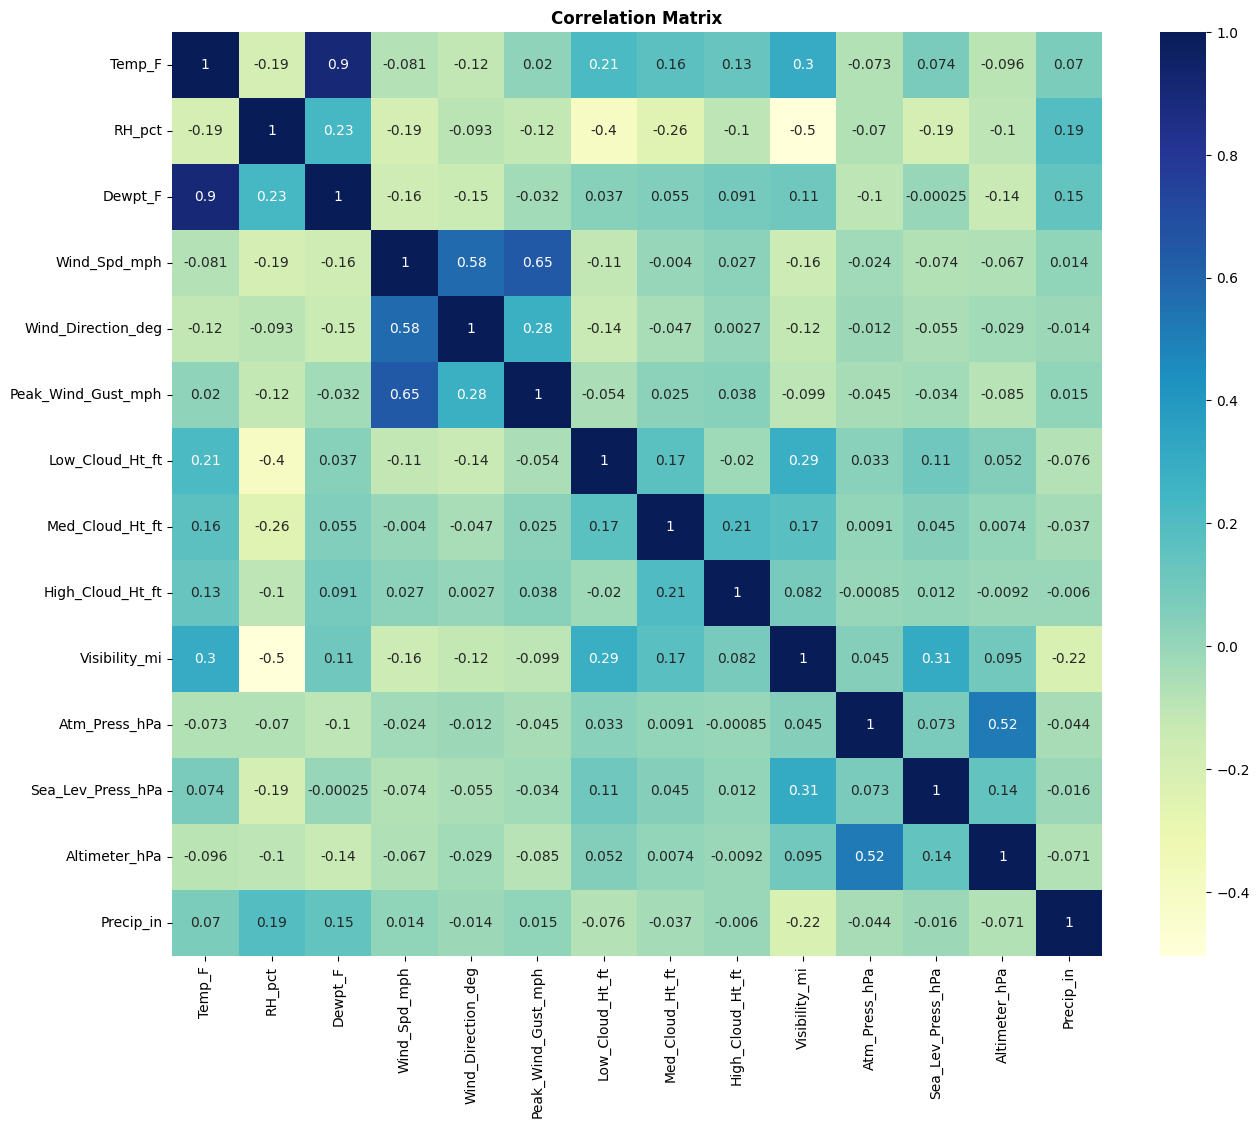

In [39]:
# Correlation 
correlation_matrix = filtered_les.corr(method = 'pearson')
plt.subplots(figsize=(15,12))

# Heatmap
sns.heatmap(correlation_matrix, annot = True, cmap = "YlGnBu")
plt.title("Correlation Matrix", size = 12, weight = 'bold')

In [40]:
filtered_les = filtered_les.drop(['Dewpt_F', 'Peak_Wind_Gust_mph'], axis=1)
filtered_les = filtered_les.reset_index(drop=True)

# Information about dataset shape
print('Total observations: ', filtered_les.shape[0])
print('Total number of features: ', filtered_les.shape[1])
filtered_les.head()

Total observations:  14951
Total number of features:  12


,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
0,60.0,49.0,10,270,3600,0,0,10,994.7,1017.8,1017.6,0.0
1,60.0,47.0,3,0,0,0,0,10,994.7,1017.7,1017.6,0.0
2,59.0,55.0,6,40,0,0,0,10,994.7,1017.8,1017.6,0.0
3,55.0,71.0,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0
4,50.0,82.0,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0


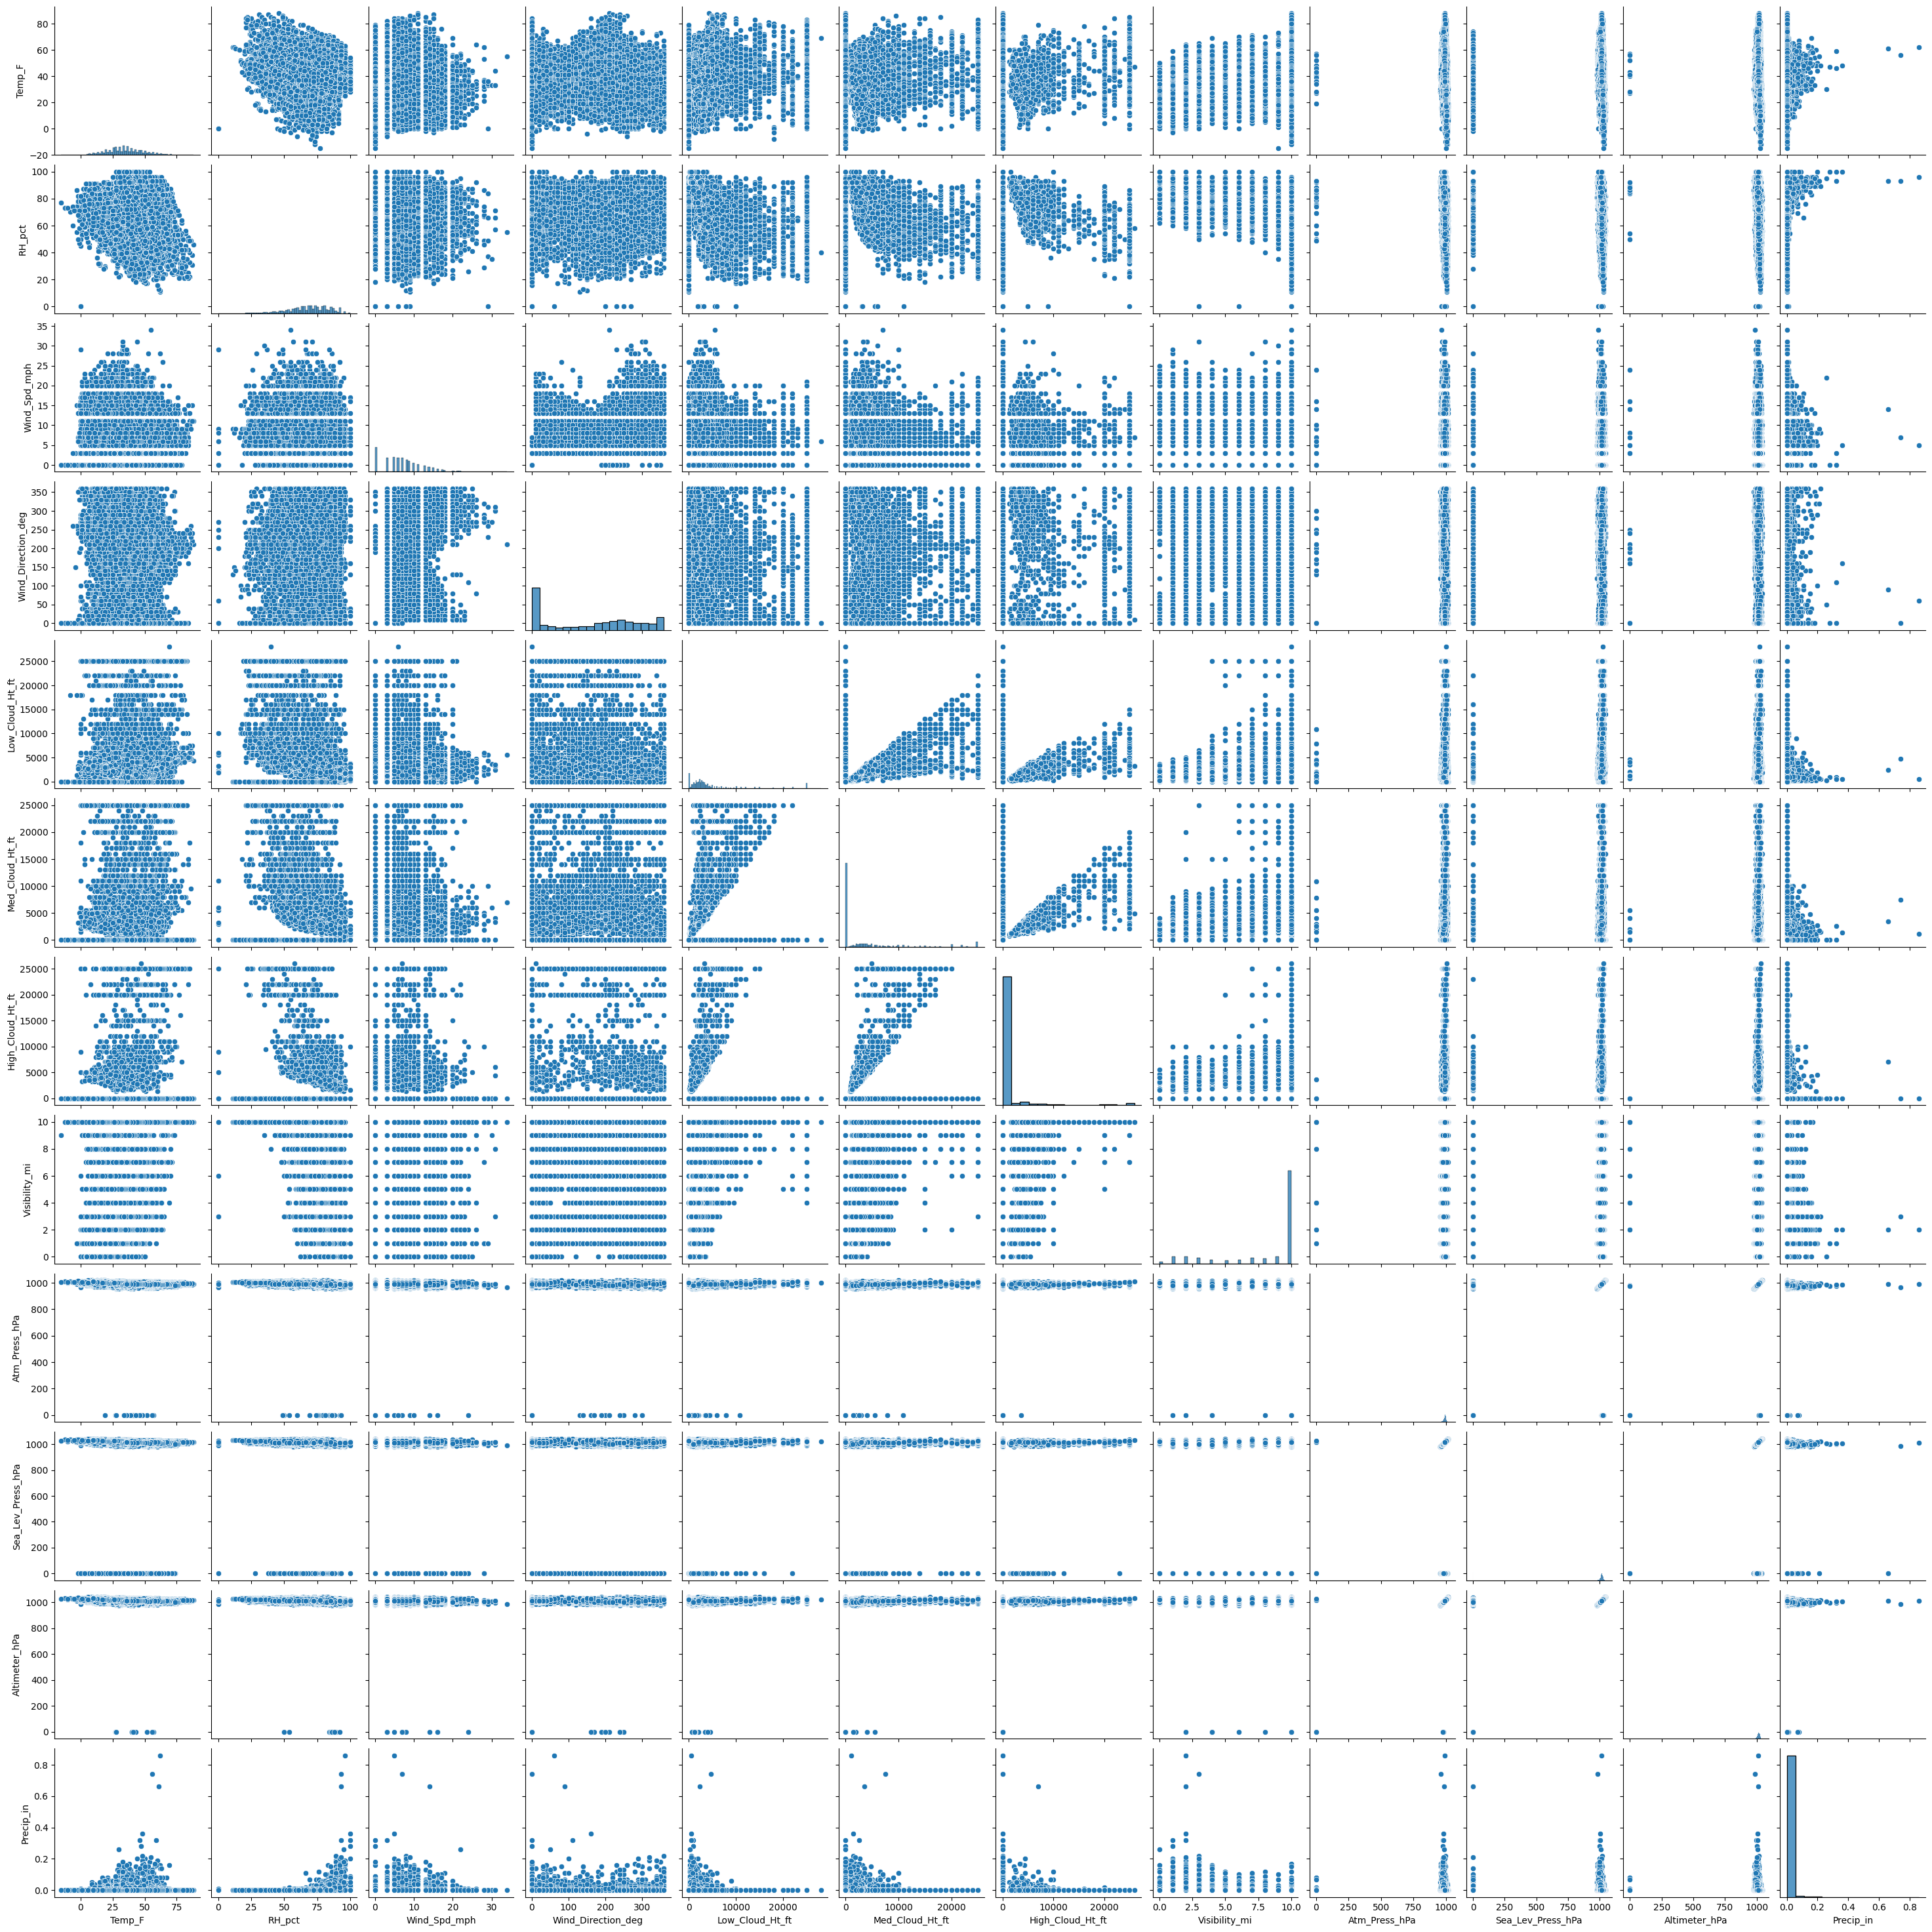

In [41]:
sns.pairplot(filtered_les)

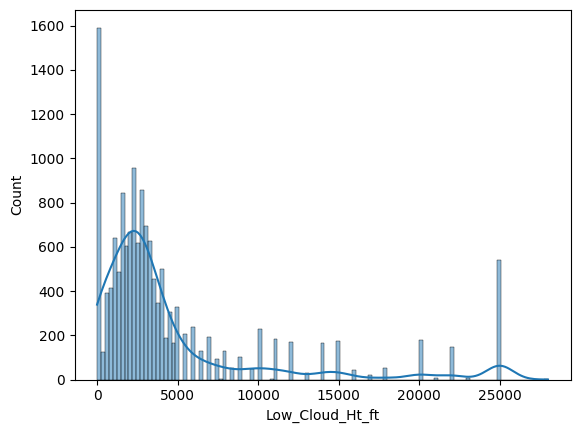

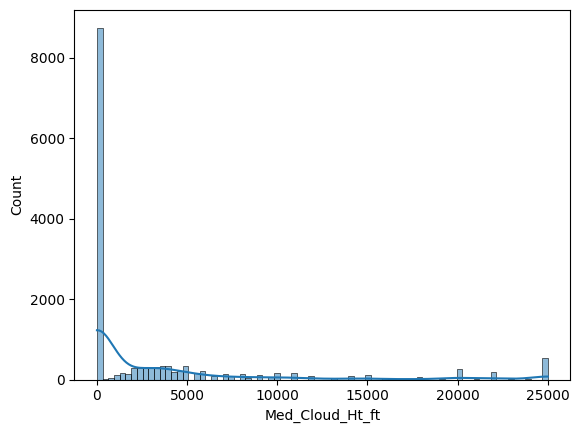

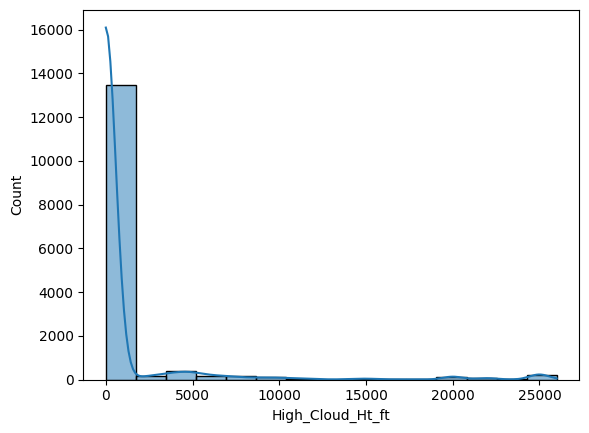

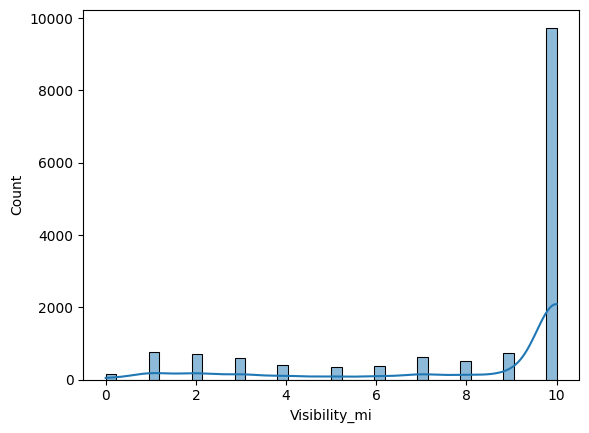

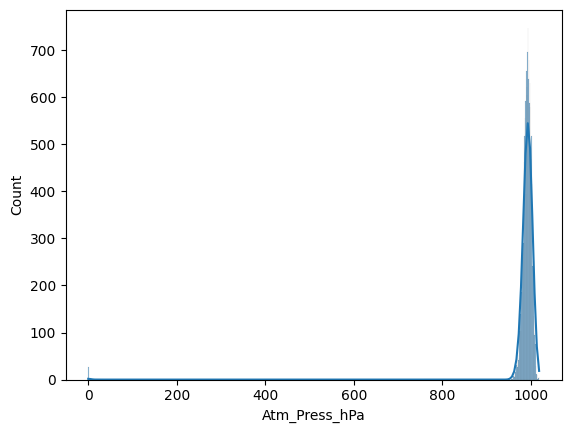

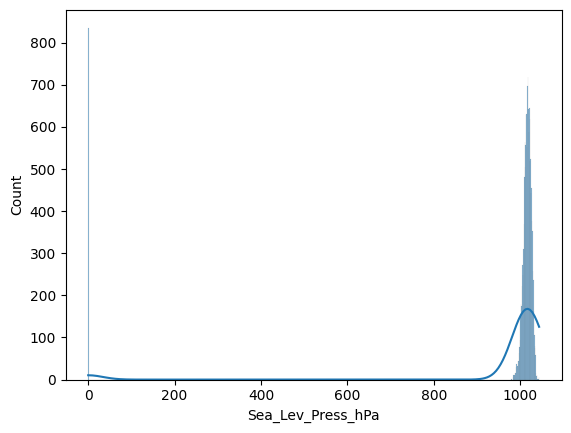

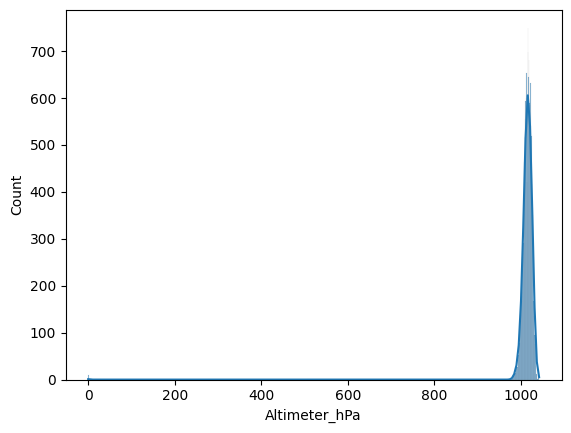

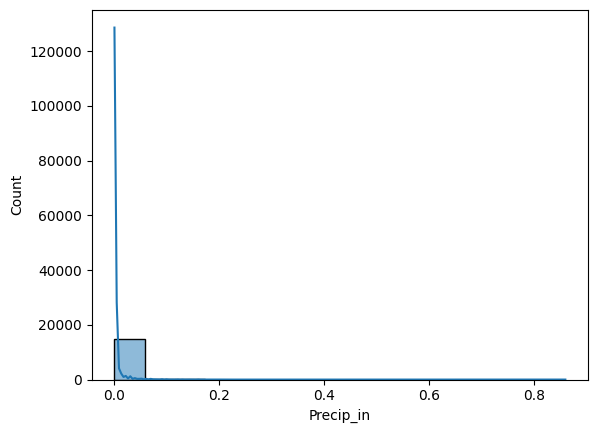

In [42]:
def distPlot(data):
    cols = data.columns[4:]
    for col in cols:
        sns.histplot(data[col], kde=True)
        plt.show()
        
distPlot(filtered_les)

In [43]:
filtered_les.columns.tolist()

['Temp_F',
 'RH_pct',
 'Wind_Spd_mph',
 'Wind_Direction_deg',
 'Low_Cloud_Ht_ft',
 'Med_Cloud_Ht_ft',
 'High_Cloud_Ht_ft',
 'Visibility_mi',
 'Atm_Press_hPa',
 'Sea_Lev_Press_hPa',
 'Altimeter_hPa',
 'Precip_in']

# Feature engineering: Precipitation

In [44]:
filtered_les["Precip_in"].value_counts()

Precip_in
0.00    13890
0.01      480
0.02      178
0.03      132
0.04       64
0.05       47
0.07       30
0.06       29
0.09       16
0.08       16
0.10       13
0.12        8
0.15        6
0.16        6
0.13        6
0.14        6
0.11        5
0.17        3
0.32        2
0.19        2
0.18        2
0.20        2
0.26        1
0.28        1
0.36        1
0.86        1
0.66        1
0.74        1
0.22        1
0.21        1
Name: count, dtype: int64

<Axes: xlabel='Precip_in', ylabel='Count'>

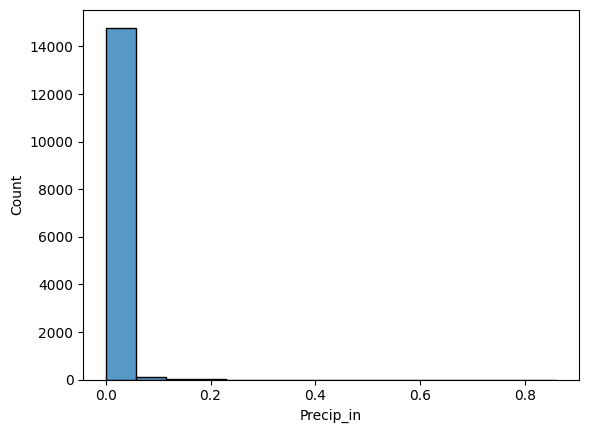

In [45]:
sns.histplot(filtered_les["Precip_in"])

In [46]:
filtered_les["Precip_in"][filtered_les["Precip_in"] > 0]

75       0.01
76       0.01
77       0.03
78       0.02
80       0.03
         ... 
14927    0.04
14928    0.01
14930    0.01
14931    0.01
14932    0.02
Name: Precip_in, Length: 1061, dtype: float64

<Axes: xlabel='Precip_in', ylabel='Count'>

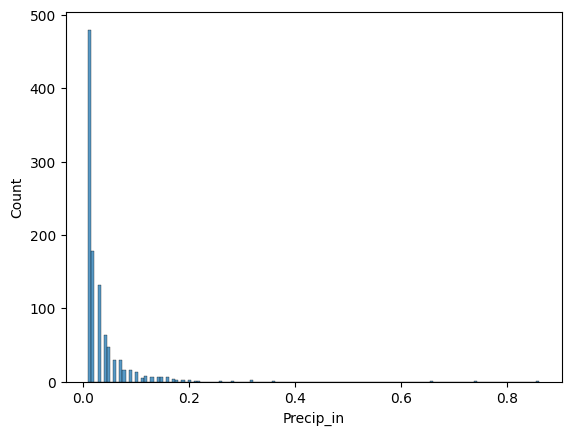

In [47]:
sns.histplot(filtered_les["Precip_in"][filtered_les["Precip_in"] > 0])

Adding a new column for precipitation:

In [48]:
filtered_les.loc[filtered_les['Precip_in'] > 0, 'LES_Precipitation'] = 1
filtered_les.loc[filtered_les['Precip_in'] <= 0, 'LES_Precipitation'] = 0
filtered_les

,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,LES_Precipitation
0,60.0,49.0,10,270,3600,0,0,10,994.7,1017.8,1017.6,0.0,0.0
1,60.0,47.0,3,0,0,0,0,10,994.7,1017.7,1017.6,0.0,0.0
2,59.0,55.0,6,40,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0
3,55.0,71.0,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0
4,50.0,82.0,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14946,39.0,54.0,5,20,7000,10000,0,10,989.0,1012.6,1011.9,0.0,0.0
14947,37.0,61.0,3,330,5500,7000,0,10,989.3,1012.8,1012.2,0.0,0.0
14948,37.0,66.0,11,310,3500,5500,0,10,990.7,1014.1,1013.5,0.0,0.0
14949,36.0,85.0,0,0,2100,2900,5000,10,991.0,1014.6,1013.9,0.0,0.0


C:\Users\Asus\AppData\Local\Temp\ipykernel_16188\3209278870.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = filtered_les['LES_Precipitation'], palette=["#7fcdbb", "#edf8b1"])


<Axes: xlabel='LES_Precipitation', ylabel='count'>

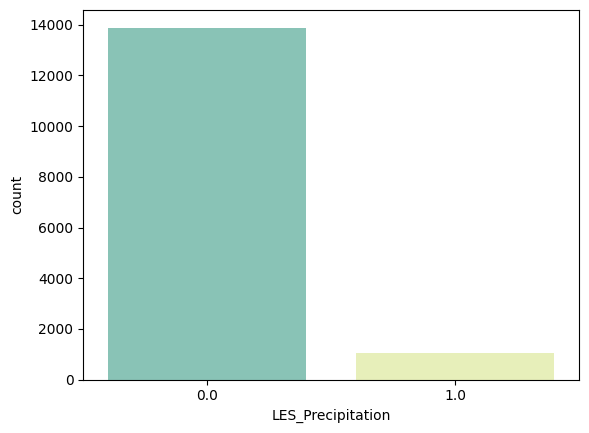

In [49]:
sns.countplot(x = filtered_les['LES_Precipitation'], palette=["#7fcdbb", "#edf8b1"])

# Predicting Cloud patterns
This means we are going to live with the nighttime discontinuity in imagery.

First, load all 64 $\times$ 64 images, with cropping of an 8-pixel border all around the lake:

In [83]:
folder_path = './Images/lake-michigan-images-64-combined/'

# List all files in the folder
file_list = os.listdir(folder_path)
images = []
# Iterate over each file
for file_name in tqdm(file_list):
    file_path = os.path.join(folder_path, file_name)
    # im shape -> (64, 64)
    im = cv2.imread(file_path)
    # Storing 1 channel, since the images are grayscale, and cropping
    images.append(im[8:-8,8:-8,0]) 
    # images shape -> (35, 64, 64) 

100%|██████████| 14952/14952 [00:08<00:00, 1768.48it/s]


In [84]:
len(images)

14952

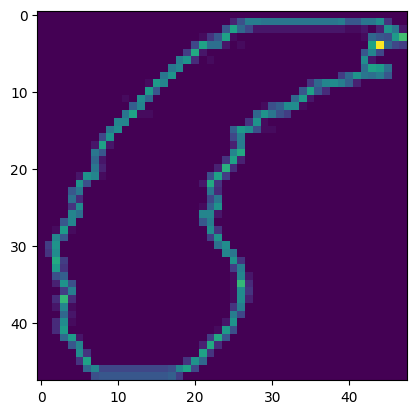

In [85]:
plt.imshow(images[146]) 

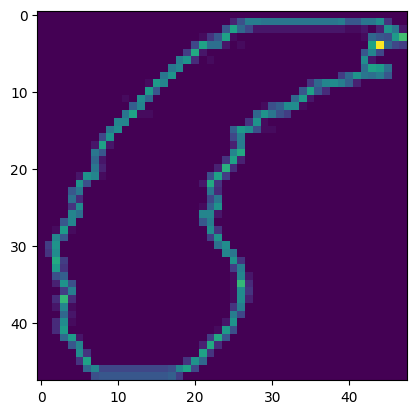

In [86]:
plt.imshow(images[147])

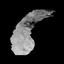

In [87]:
from PIL import Image, ImageOps
Image.open(r'./Images/lake-michigan-images-64/none/147.png')

## Cloud Sequence Visualization

Our data consists of sequences of frames, each of which
are used to predict the upcoming frame. Let's take a look
at some of these sequential frames.


Displaying next frames starting at image 11139.


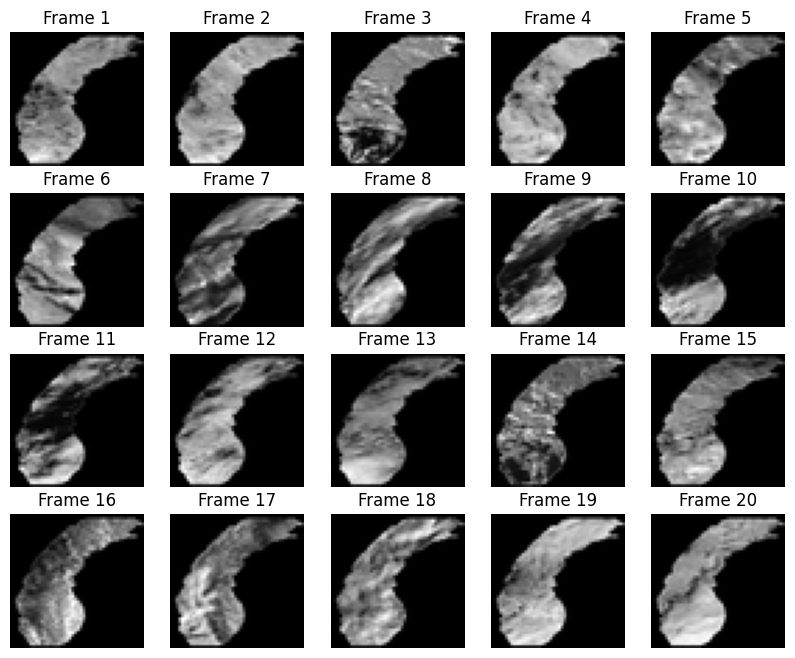

In [88]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(4, 5, figsize=(10, 8))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(images)), size=1)[0]
for idx, ax in enumerate(axes.flat):
    ax.imshow(images[data_choice + idx], cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying next frames starting at image {data_choice}.")
plt.show()

Since daytime only consists of 7 hours, this image sequence of length 20 obligatorily includes nighttimes. In other words, there is an image above that jumps over nighttime and thus is more discontinuous in cloud cover.

20 images is about 3 days (3 $\times$ 7). 

As an exercise, let's see if based on 6 hours of cloud cover, we can predict the 7th hour.

We are going to use 6 sequential images as the input, and the next (shifted by 1) 6 images as output.

# Image sequences prep
### Image tensor caching with `tf.keras.preprocessing.timeseries_dataset_from_array` api


In [89]:
from tqdm import tqdm
import cv2

batch = []
for idx in tqdm(range(100)):
    # im shape -> (64, 64)
    im = cv2.imread(f'./Images/lake-michigan-images-64-combined/{int(idx)}.png')
    # Storing 1 channel, since the images are grayscale
    batch.append(im[:,:,0]) 
    # images shape -> (35, 64, 64) 

100%|██████████| 100/100 [00:00<00:00, 3769.11it/s]


In [90]:
len(batch), batch[0].shape

(100, (64, 64))

This is how we can create a sliding-window sequence of size 6, which takes the 100 images above and creates as many 6-long image sequences as possible with a size-1 sliding window so that the first sequence starts with the first image, the second sequence starts with the second image, etc.  

In [91]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox

In [92]:
sliding_batch = tf.keras.preprocessing.timeseries_dataset_from_array(batch, None, 6, sequence_stride=1, sampling_rate=1, 
                                                                     batch_size=1000)

In [93]:
imgs_train_batch = tf.keras.preprocessing.timeseries_dataset_from_array(images[:3000], None, 7, sequence_stride=1, 
                                                                        sampling_rate=1, batch_size=3000)
imgs_val_batch = tf.keras.preprocessing.timeseries_dataset_from_array(images[3000:4000], None, 7, sequence_stride=1, 
                                                                       sampling_rate=1, batch_size=1000)

In [94]:
for batch in imgs_train_batch:
    print(batch.shape)
    print('--')

(2994, 7, 48, 48)
--


In [95]:
for batch in imgs_val_batch:
    print(batch.shape)
    print('--')

(994, 7, 48, 48)
--


Let's add a channel dimension and Normalize the data to the 0-1 range:

In [96]:
train_dataset = None
for batch in imgs_train_batch:
    train_dataset = np.expand_dims(batch, axis=-1)
    print(train_dataset.shape)
    train_dataset = train_dataset / 255

(2994, 7, 48, 48, 1)


In [97]:
val_dataset = None
for batch in imgs_val_batch:
    val_dataset = np.expand_dims(batch, axis=-1)
    print(val_dataset.shape)
    val_dataset = val_dataset / 255

(994, 7, 48, 48, 1)


We'll define a helper function to shift the frames, where `x` is frames 0 to n - 1, and `y` is frames 1 to n.

In [98]:
def create_shifted_frames(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:, 1 : data.shape[1], :, :]
    return x, y

# Apply the processing function to the datasets.
x_train, y_train = create_shifted_frames(train_dataset)
x_val, y_val = create_shifted_frames(val_dataset)

# Inspect the dataset.
print("Training Dataset Shapes: " + str(x_train.shape) + ", " + str(y_train.shape))
print("Validation Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))

Training Dataset Shapes: (2994, 6, 48, 48, 1), (2994, 6, 48, 48, 1)
Validation Dataset Shapes: (994, 6, 48, 48, 1), (994, 6, 48, 48, 1)


## Data Visualization

Our data consists of sequences of frames, each of which
are used to predict the upcoming frame. Let's take a look
at some of these sequential frames.

Displaying frames for example 1729.


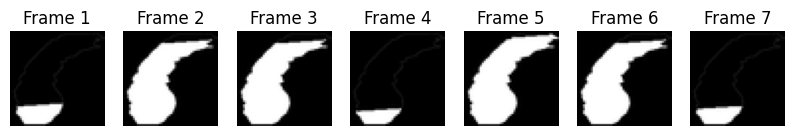

In [99]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(1, 7, figsize=(10, 8))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(train_dataset)), size=1)[0]
for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(train_dataset[data_choice][idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice}.")
plt.show()

## Model Construction

To build a Convolutional LSTM model, we will use the
`ConvLSTM2D` layer, which will accept inputs of shape
`(batch_size, num_frames, width, height, channels)`, and return
a prediction movie of the same shape.

In [100]:
x_train.shape

(2994, 6, 48, 48, 1)

In [101]:
x_train.shape[2:]

(48, 48, 1)

In [102]:
(None, x_train.shape[2:])

(None, (48, 48, 1))

In [103]:
(None, *x_train.shape[2:])

(None, 48, 48, 1)

In [104]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.Conv2D(
    filters=64,
    kernel_size=(5, 5),
    padding="same",
    activation="relu",
)(inp)
print("Conv2D kernel_size=(5, 5)", x.shape)

Conv2D kernel_size=(5, 5) (None, None, 48, 48, 64)


In [105]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
print("ConvLSTM2D kernel_size=(5, 5)", x.shape)
x = layers.LayerNormalization()(x)
print("LayerNormalization", x.shape)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D kernel_size=(3, 3)", x.shape)
x = layers.LayerNormalization()(x)
print("LayerNormalization", x.shape)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D kernel_size=(1, 1)", x.shape)
x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)
print("Conv3D kernel_size=(3, 3, 3)", x.shape)

ConvLSTM2D kernel_size=(5, 5) (None, None, 48, 48, 64)
LayerNormalization (None, None, 48, 48, 64)
ConvLSTM2D kernel_size=(3, 3) (None, None, 48, 48, 64)
LayerNormalization (None, None, 48, 48, 64)
ConvLSTM2D kernel_size=(1, 1) (None, None, 48, 48, 64)
Conv3D kernel_size=(3, 3, 3) (None, None, 48, 48, 1)


In [106]:
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, 48, 48, 1)  0         
                             ]                                   
                                                                 
 conv_lstm2d_3 (ConvLSTM2D)  (None, None, 48, 48, 64)  416256    
                                                                 
 layer_normalization_2 (Laye  (None, None, 48, 48, 64)  128      
 rNormalization)                                                 
                                                                 
 conv_lstm2d_4 (ConvLSTM2D)  (None, None, 48, 48, 64)  295168    
                                                                 
 layer_normalization_3 (Laye  (None, None, 48, 48, 64)  128      
 rNormalization)                                                 
                                                           

## Model Training

With our model and data constructed, we can now train the model.

Early stopping: Stop training when a monitored metric has stopped improving. The [EarlyStopping](https://keras.io/api/callbacks/early_stopping/) callback assumes the goal of a training is to minimize the loss. With this, the metric to be monitored would be 'loss', and mode would be 'min'. A model.fit() training loop will check at end of every epoch whether the loss is no longer decreasing, considering the min_delta and patience if applicable. Once it's found no longer decreasing, model.stop_training is marked True and the training terminates.

Reducing learning rate when a metric has stopped improving: Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. The [ReduceLROnPlateau](https://keras.io/api/callbacks/reduce_lr_on_plateau/) callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

Using parameter `min_delta=0.005` (`min_delta=0.0001` default)

In [107]:
# Define some callbacks to improve training
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, min_delta=0.005)

# Define modifiable training hyperparameters
epochs = 10
batch_size = 5

from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Started training at", current_time)

# Fit the model to the training data
model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
)

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Finished training at", current_time)

Started training at 15:32:31
Epoch 1/10
599/599 [==============================] - 229s 374ms/step - loss: 0.1280 - val_loss: 0.2583 - lr: 0.0010
Epoch 2/10
599/599 [==============================] - 224s 374ms/step - loss: 0.1115 - val_loss: 0.2541 - lr: 0.0010
Epoch 3/10
599/599 [==============================] - 223s 372ms/step - loss: 0.1099 - val_loss: 0.2537 - lr: 0.0010
Epoch 4/10
599/599 [==============================] - 223s 372ms/step - loss: 0.1091 - val_loss: 0.2532 - lr: 0.0010
Epoch 5/10
599/599 [==============================] - 223s 372ms/step - loss: 0.1084 - val_loss: 0.2544 - lr: 0.0010
Epoch 6/10
599/599 [==============================] - 223s 373ms/step - loss: 0.1077 - val_loss: 0.2536 - lr: 0.0010
Epoch 7/10
599/599 [==============================] - 223s 372ms/step - loss: 0.1070 - val_loss: 0.2523 - lr: 0.0010
Epoch 8/10
599/599 [==============================] - 223s 372ms/step - loss: 0.1065 - val_loss: 0.2519 - lr: 0.0010
Epoch 9/10
599/599 [===============

## Frame Predictions

In [108]:
example_index = np.random.choice(range(len(val_dataset)), size=1)[0]
print(example_index)
example = val_dataset[example_index]
print(example.shape)
print(example[:3, ...].shape)
print(example[3:-1, ...].shape)

258
(7, 48, 48, 1)
(3, 48, 48, 1)
(3, 48, 48, 1)


Picked index 204 from validation dataset.
1/1 [==============================] - 1s 636ms/step

The top row consists of 7 original frames.
The bottom row consists of the 5 original frames and the next two are predicted.


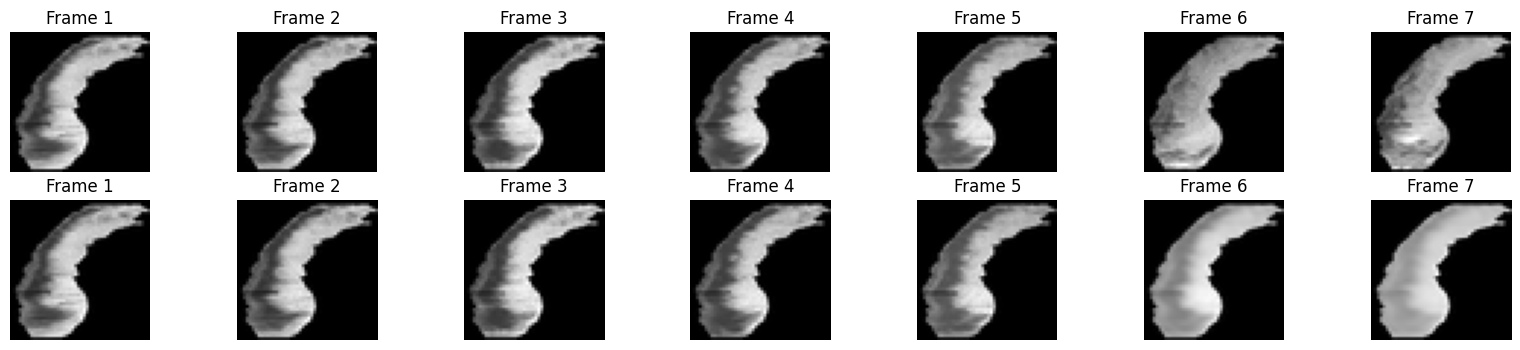

In [109]:
# Select a random example from the validation dataset
example_index = np.random.choice(range(len(val_dataset)), size=1)[0]
print("Picked index", example_index,"from validation dataset.")
example = val_dataset[example_index]

# Pick the first 5 frames from the example
frames = example[:5, ...]
original_frames = example[:, ...]

# Use the first 5 frames to predict the next 2 frames
# Note that the last predicted frame uses the first predicted
# frame (so, no teacher forcing here)
for _ in range(2):
    # Extract the model's prediction and post-process it
    new_prediction = model.predict(np.expand_dims(frames, axis=0))
    new_prediction = np.squeeze(new_prediction, axis=0)
    predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)

    # Extend the set of prediction frames.
    frames = np.concatenate((frames, predicted_frame), axis=0)

# Construct a figure for the original and new frames
fig, axes = plt.subplots(2, 7, figsize=(20, 4))

# Plot the original frames
for idx, ax in enumerate(axes[0]):
    ax.imshow(np.squeeze(original_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Plot the new frames
new_frames = frames[:, ...]
for idx, ax in enumerate(axes[1]):
    ax.imshow(np.squeeze(new_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Display
print()
print("The top row consists of 7 original frames.")
print("The bottom row consists of the 5 original frames and the next two are predicted.")
plt.show()

In [110]:
frames.shape

(7, 48, 48, 1)

In [111]:
frames[6].shape

(48, 48, 1)

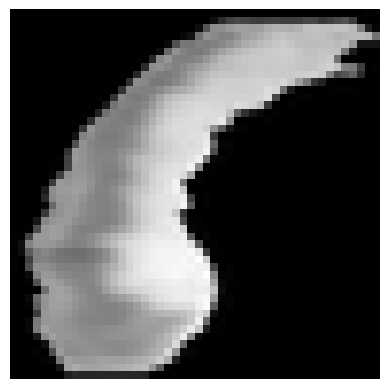

In [112]:
import cv2
import numpy as np


# Display the image using matplotlib
plt.imshow(frames[5], cmap='gray')  # Use cmap='gray' for grayscale images
plt.axis('off')  # Turn off axis labels
plt.show()


In [113]:
# Calculate the sum of pixel values
sum_pixel_values = frames[5].sum()

# Get the total number of pixels
total_pixels = frames[5].size

# Calculate the intensity
intensity = sum_pixel_values / total_pixels

print(f"The intensity of the image is: {intensity}")

new_intensity = [[intensity]]  
new_intensity_scaled = scaler.transform(new_intensity)
predicted_class = rf_classifier.predict(new_intensity_scaled)
predicted_class_label = list(class_mapping.keys())[list(class_mapping.values()).index(predicted_class[0])]
print(f"Predicted rain class for intensity {new_intensity[0][0]}: {predicted_class_label}")


The intensity of the image is: 0.20017753024816554
Predicted rain class for intensity 0.20017753024816554: none


C:\Users\Asus\anaconda3\envs\tfgpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


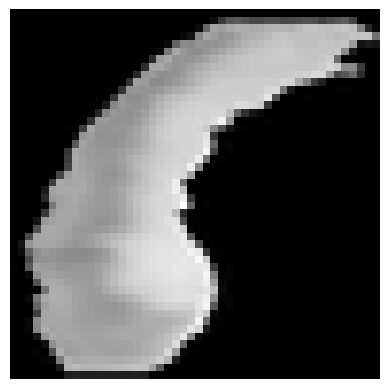

In [114]:
# Display the image using matplotlib
plt.imshow(frames[6], cmap='gray')  # Use cmap='gray' for grayscale images
plt.axis('off')  # Turn off axis labels
plt.show()

In [115]:
# Calculate the sum of pixel values
sum_pixel_values = frames[6].sum()

# Get the total number of pixels
total_pixels = frames[6].size

# Calculate the intensity
intensity = sum_pixel_values / total_pixels

print(f"The intensity of the image is: {intensity}")

new_intensity = [[intensity]]  
new_intensity_scaled = scaler.transform(new_intensity)
predicted_class = rf_classifier.predict(new_intensity_scaled)
predicted_class_label = list(class_mapping.keys())[list(class_mapping.values()).index(predicted_class[0])]
print(f"Predicted rain class for intensity {new_intensity[0][0]}: {predicted_class_label}")

The intensity of the image is: 0.20180491739451087
Predicted rain class for intensity 0.20180491739451087: none


C:\Users\Asus\anaconda3\envs\tfgpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
